MEASURING DISTANCE BETWEEN TWO CONVEX SETS

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def subtract(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

def dot(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def normalize(v):
    magnitude = np.linalg.norm(v)
    return [v[i] / magnitude for i in range(len(v))] if magnitude != 0 else [0] * len(v)

def support(shape, direction):
    return max(shape, key=lambda v: dot(v, direction))

In [10]:


def gjk_distance(shape1, shape2):
    direction = normalize(subtract(shape2[0], shape1[0]))
    simplex = [support(shape1, direction), support(shape2, [-d for d in direction])]
    direction = subtract([0] * len(direction), simplex[0])

    while True:
        new_point = support(shape1, direction)
        if dot(new_point, direction) <= 0:
            return np.linalg.norm(simplex[0]), simplex[0], simplex[1]

        simplex.append(new_point)
        if len(simplex) == 3:
            if dot(simplex[1], direction) < dot(simplex[0], direction):
                simplex.pop(0)
            else:
                simplex.pop(1)

            direction = subtract([0] * len(direction), simplex[0])
        else:
            break

def plot_shapes(shape1, shape2, distance_info):
    fig, ax = plt.subplots()
    
    shape1 = np.array(shape1)
    shape2 = np.array(shape2)
    
    ax.plot(*shape1.T, 'bo-', label='Shape 1')
    ax.plot(*shape2.T, 'go-', label='Shape 2')
    
    distance, p1, p2 = distance_info
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r--', label=f'Distance: {distance:.2f}')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal')
    plt.show()

def get_shape_input(name):
    points = []
    num_points = int(input(f"Enter the number of points in {name}: "))
    for _ in range(num_points):
        x, y = map(float, input(f"Enter the x and y coordinates of a point separated by space: ").split())
        points.append([x, y])
    points.append(points[0])  # Close the shape by appending the first point at the end
    return points


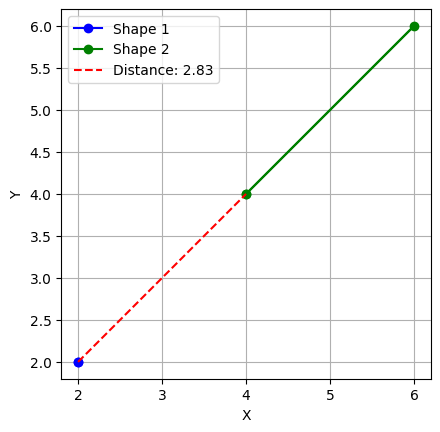

In [11]:
def main():
    shape1 = get_shape_input("Shape 1")
    shape2 = get_shape_input("Shape 2")
    
    distance_info = gjk_distance(shape1, shape2)
    plot_shapes(shape1, shape2, distance_info)

if __name__ == "__main__":
    main()



---------------------------------END-------------------------------------